In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Women%20Entrepreneurship%20and%20Labor%20Force/Dataset3.csv",sep= ";")

In [27]:
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [29]:
data

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.10
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.00
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.50
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.70
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.60
5,20,Germany,Developed,Member,Euro,63.6,67.4,0.50,69.90
6,22,Greece,Developed,Member,Euro,43.0,42.0,-1.70,42.50
7,28,Ireland,Developed,Member,Euro,64.3,65.3,-0.30,59.40
8,30,Italy,Developed,Member,Euro,51.4,41.3,0.00,47.20
9,34,Latvia,Developed,Member,Euro,56.6,54.5,0.20,66.40


In [30]:
data["Level of development"].value_counts()

Developed     27
Developing    24
Name: Level of development, dtype: int64

In [31]:
data["European Union Membership"].value_counts()

Not Member    31
Member        20
Name: European Union Membership, dtype: int64

In [32]:
data["Currency"].value_counts()

National Currency    36
Euro                 15
Name: Currency, dtype: int64

In [33]:
import requests
import io
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
s=requests.get(url).content
codes = pd.read_csv(io.StringIO(s.decode('utf-8')))
codes = codes[['name','alpha-3']]
codes.columns = ['Country','Code']
codes.head()

,Country,Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [34]:
data = pd.merge(data,codes,on = 'Country')
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Code
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,AUT
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,BEL
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,EST
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,FIN
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,FRA


In [35]:
data = data.drop('No',axis = 1)

In [36]:
data.describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,47.000000,47.000000,47.000000,47.000000
mean,48.504255,47.731915,2.325106,57.871702
std,14.449958,16.088871,5.241652,14.147188
min,25.300000,24.800000,-2.250000,13.000000
25%,36.750000,32.150000,-0.500000,55.800000
50%,49.900000,45.400000,0.500000,60.800000
75%,61.700000,65.400000,2.500000,66.950000
max,74.800000,77.600000,26.500000,82.300000


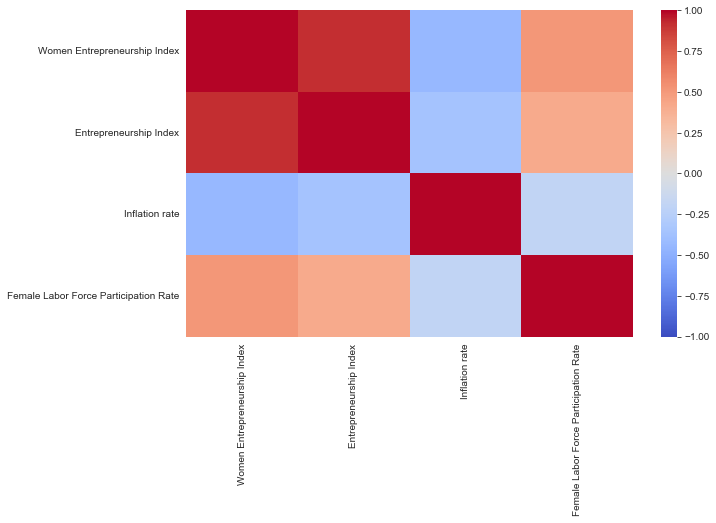

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),vmax = 1,vmin = -1,cmap = 'coolwarm');

In [38]:
fig = px.choropleth(data,locations='Code',color = 'Women Entrepreneurship Index',hover_name='Country',
                    hover_data = ['Level of development', 'Entrepreneurship Index',"Women Entrepreneurship Index",'Inflation rate','Female Labor Force Participation Rate'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [39]:
px.scatter(data, x ='Inflation rate', y = 'Entrepreneurship Index')

In [40]:
px.scatter(data, x ='Women Entrepreneurship Index', y = 'Entrepreneurship Index')

In [41]:
px.scatter(data, x ='Women Entrepreneurship Index', y = 'Female Labor Force Participation Rate')

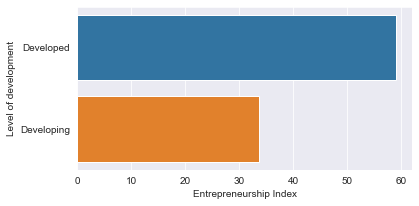

In [42]:
plt.figure(figsize=(6,3))
sns.barplot(y = 'Level of development', x = 'Entrepreneurship Index', data = data,ci = None);

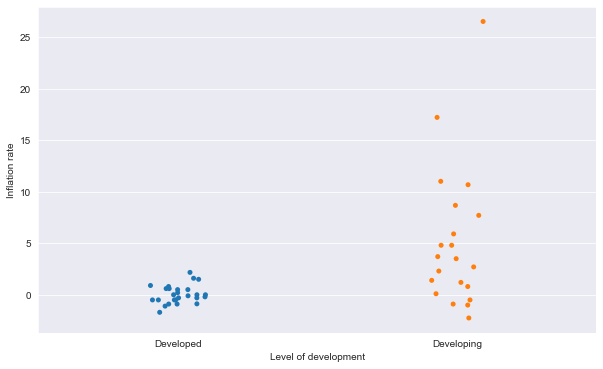

In [43]:
plt.figure(figsize=(10,6))
sns.stripplot(x = 'Level of development', y = 'Inflation rate', data = data);

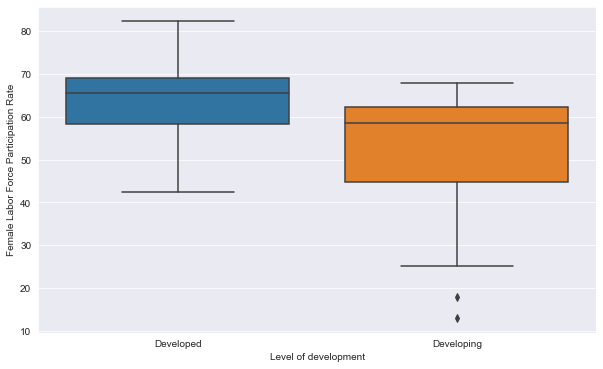

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Level of development', y = 'Female Labor Force Participation Rate', data = data);

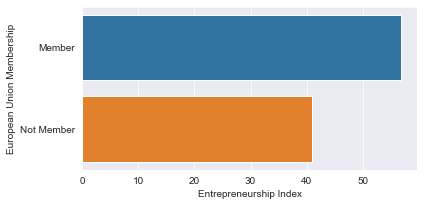

In [45]:
plt.figure(figsize=(6,3))
sns.barplot(y = 'European Union Membership', x = 'Entrepreneurship Index', data = data,ci = None);

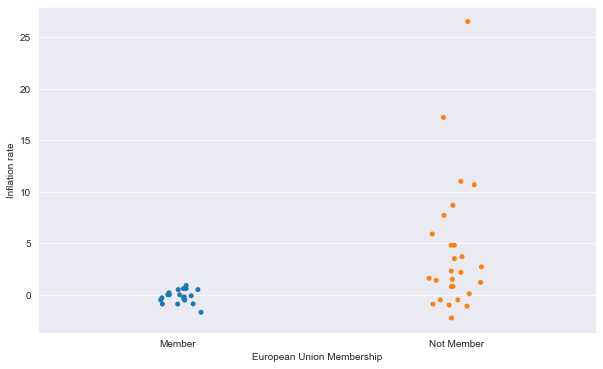

In [46]:
plt.figure(figsize=(10,6))
sns.stripplot(x = 'European Union Membership', y = 'Inflation rate', data = data);

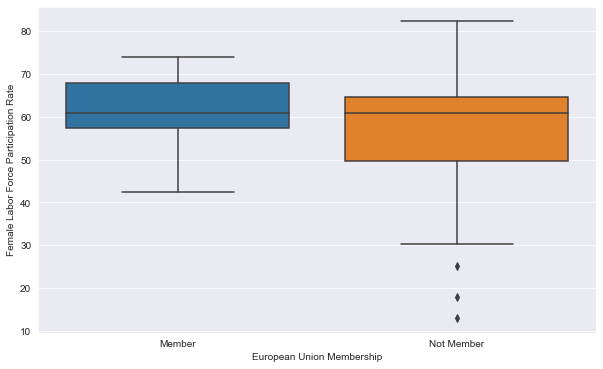

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'European Union Membership', y = 'Female Labor Force Participation Rate', data = data);